# Get Chunk Info 

Here I've started working on the code that takes a time series seperates it into chunks, get a value and a rate of change for each chunk, this is the information that we are going to do the matching on. Untill we have another name for the process I'll call it getting chunk info (pre-match processing or something). 

The objective of this notebook is to show that yes the functions are working as expected and to also take a look at what this data actually looks like. 

In [1]:
from stitches.pkgimports import *
import stitches.dev_matchup as matchup
from plotnine import *
# aka ggplot see https://realpython.com/ggplot-python/
# more examples https://monashdatafluency.github.io/python-workshop-base/modules/plotting_with_ggplot/

/Users/dorh012/Documents/2021/stitches/stitches/pkgimports.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# read int the hector csv this is an example data frame.
hector_data = pd.read_csv('/Users/dorh012/Documents/2021/stitches/notebooks/dev/hector_data.csv')
hector_data = hector_data[hector_data["year"] <= 2100].copy()

# For every period determine the temp value and the rate of change. 
data = matchup.chunk_ts(hector_data, 5)
out_5 = matchup.get_chunk_info(data)
out_5["window"] = "5"

# For every period determine the temp value and the rate of change. 
data = matchup.chunk_ts(hector_data, 10)
out_10 = matchup.get_chunk_info(data)
out_10["window"] = "10"

# For every period determine the temp value and the rate of change. 
data = matchup.chunk_ts(hector_data, 20)
out_20 = matchup.get_chunk_info(data)
out_20["window"] = "20"

In [3]:
out_10.head()

,variable,run_name,units,start_yr,end_yr,year,fx,dx,window
0,Tgav,rcp45,degC,1746,1755,1751,-0.000046,-0.000051,10
0,Tgav,rcp45,degC,1756,1765,1761,-0.001409,-0.000163,10
0,Tgav,rcp45,degC,1766,1775,1771,0.047330,0.006764,10
0,Tgav,rcp45,degC,1776,1785,1781,0.098290,-0.000250,10
0,Tgav,rcp45,degC,1786,1795,1791,0.066410,-0.000143,10


Let's take a look at what happens when the window size changes, are we able to change the 

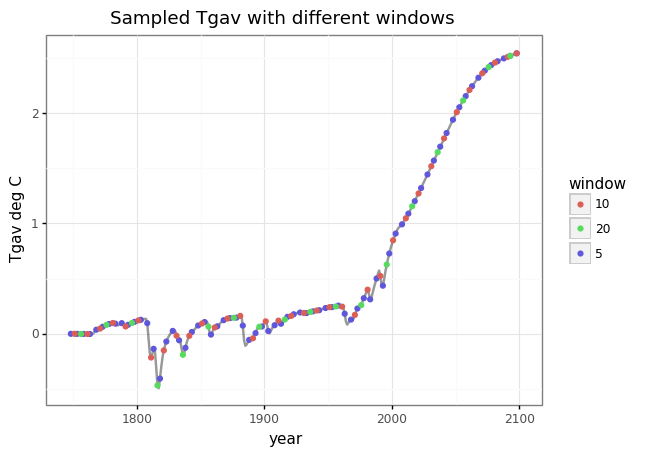

<ggplot: (386044785)>

In [4]:
df = pd.concat([out_5, out_10, out_20], ignore_index=True)

(ggplot() + 
 geom_line(aes(x = "year", y = "value"), data = hector_data, size = 1, alpha = 0.4) +
 geom_point(aes(x = "year", y = "fx", color = "window"), data = df) + 
 labs(title = "Sampled Tgav with different windows ", y = "Tgav deg C", x = "year") + 
 theme_bw()
)


Note that the grey line is the input Hector data that is being chunked up, so it looks like to me that yes, the function is doing what we were expecting to do! It is selecting data at different intervals. 


Now how does the window affect the slope? 

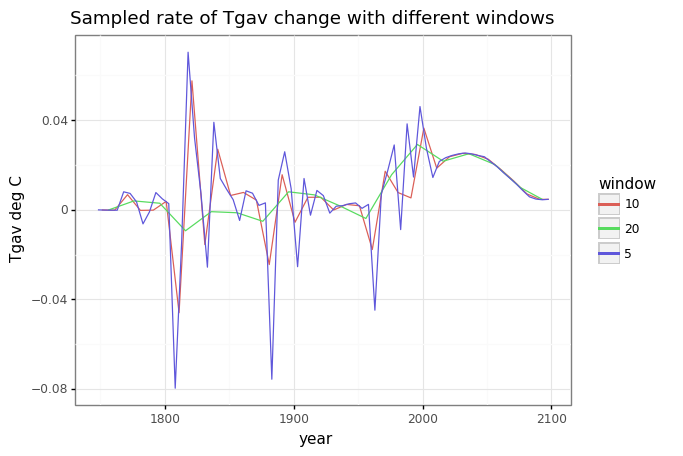

<ggplot: (386058625)>

In [5]:
(ggplot() + 
 geom_line(aes(x = "year", y = "dx", color = "window"), data = df) + 
 labs(title = "Sampled rate of Tgav change with different windows ", y = "Tgav deg C", x = "year") + 
 theme_bw())

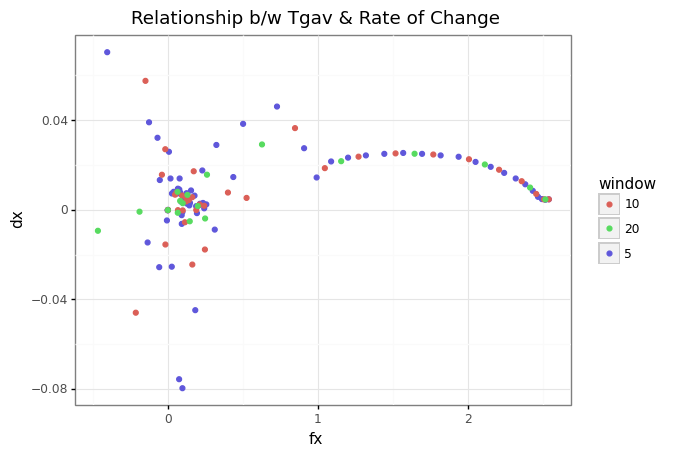

<ggplot: (386462965)>

In [6]:
(ggplot() + 
 geom_point(aes(x = "fx", y = "dx", color = "window"), data = df) + 
 labs(title = "Relationship b/w Tgav & Rate of Change", y = "dx", x = "fx") + 
 theme_bw())